In [ ]:
# Importing all necessary libraries
# FINAL FRAME CAPTURE CODE

import cv2
import os
import math

# Read the video from specified path
vid_no="V5"
vid = cv2.VideoCapture("M:\PBL\V5.mp4")
# vid = cv2.VideoCapture("M:\PBL" + vid_no+".mp4")
frameRate = vid.get(5) #frame rat

try:

    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

# if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# frame
currentframe = 0

while (True):

    frameId = vid.get(1)
    # reading from frame
    success, frame = vid.read()

    if success:


        cv2.imshow("Output",frame)
        if (frameId % math.floor(frameRate) == 0):

        # continue creating images until video remains
#         cv2.waitKey(80);


            name = 'M:/Face-Recognition-Dataset/data/frame' + vid_no +"-" + str(currentframe) + '.jpg'
            print('Creating...' + name)

        # writing the extracted images
            cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
            currentframe += 1
    else:
        break

# Release all space and windows once done
vid.release()
cv2.destroyAllWindows()

In [ ]:
!pip install face_recognition
# !git clone https://github.com/VarshaV16/Face-Recognition-Dataset.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d59f194b7dbdec32e4789d39660b62cfa2e18badc915ccbda1728cf7517104d5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
import os

# Set video folder and output folder paths
video_folder = 'videos'
output_folder = 'output_images'

# Loop through all videos
for video in os.listdir(video_folder):

  vidcap = cv2.VideoCapture(os.path.join(video_folder, video))
  count = 0

  # Read video frame by frame
  success, image = vidcap.read()
  while success:
    # Save frame as jpeg image
    cv2.imwrite(os.path.join(output_folder, "frame%d.jpg" % count), image)

    # Read next frame after 1 millisecond
    success,image = vidcap.read()
    count += 1

print("Frames extracted and saved successfully!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#all videos analysis

import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_name = []
known_dir = '/content/drive/MyDrive/PBLVideos/Known'
known_cnt=0

for file in os.listdir(known_dir):
  try:
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_name.append(file.split('.')[0])
  except:
    print("Something went wrong")
    continue

unknown_dir = '/content/drive/MyDrive/PBLVideos/Target'
for file in os.listdir(unknown_dir):
  try:
    if file == '.ipynb_checkpoints':
      continue
    print('Processing....', file)

    # print(file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
      if results[i]:
        print(known_name[i])

        name = known_name[i]
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left,top), (right,bottom), (0,0,255), 2)
        cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
        cv2_imshow(img)
        known_cnt+=1
    # print(results)
  except:
    print('Cannot Process....', file)

  print("Total identified: ", known_cnt)


In [ ]:
#tanish video- without api
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_name = []
known_dir = '/content/drive/MyDrive/PBLVideos/New_known'
known_cnt=0

for file in os.listdir(known_dir):
  try:
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_name.append(file.split('.')[0])
  except:
    print("Something went wrong")
    continue

unknown_dir = '/content/drive/MyDrive/PBLVideos/Output/Tanish'
for file in os.listdir(unknown_dir):
  try:
    if file == '.ipynb_checkpoints':
      continue
    print('Processing....', file)

    # print(file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
      if results[i]:
        print(known_name[i])
        name = known_name[i]
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left,top), (right,bottom), (0,0,255), 2)
        cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
        cv2_imshow(img)
        known_cnt+=1
    # print(results)
  except:
    print('Cannot Process....', file)


Processing.... frame_0.0.jpg
Cannot Process.... frame_0.0.jpg
Processing.... frame_1.0.jpg
Cannot Process.... frame_1.0.jpg
Processing.... frame_2.0.jpg
Cannot Process.... frame_2.0.jpg
Processing.... frame_3.0.jpg
Cannot Process.... frame_3.0.jpg
Processing.... frame_4.0.jpg
Cannot Process.... frame_4.0.jpg
Processing.... frame_5.0.jpg
Cannot Process.... frame_5.0.jpg
Processing.... frame_6.0.jpg
Cannot Process.... frame_6.0.jpg
Processing.... frame_7.0.jpg
Cannot Process.... frame_7.0.jpg
Processing.... frame_8.0.jpg
Cannot Process.... frame_8.0.jpg
Processing.... frame_9.0.jpg
Cannot Process.... frame_9.0.jpg
Processing.... frame_10.0.jpg
Cannot Process.... frame_10.0.jpg
Processing.... frame_11.0.jpg
Cannot Process.... frame_11.0.jpg
Processing.... frame_12.0.jpg
Cannot Process.... frame_12.0.jpg
Processing.... frame_13.0.jpg
Cannot Process.... frame_13.0.jpg
Processing.... frame_14.0.jpg
Cannot Process.... frame_14.0.jpg
Processing.... frame_15.0.jpg
Cannot Process.... frame_15.0.

In [ ]:
#first video- with api
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_name = []
known_dir = 'Face-Recognition-Dataset/Known'

for file in os.listdir(known_dir):
  try:
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_name.append(file.split('.')[0])
  except:
    print("Something went wrong")
    continue

unknown_dir = 'apiimages'
for file in os.listdir(unknown_dir):
  try:
    if file == '.ipynb_checkpoints':
      continue
    print('Processing....', file)

    # print(file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
      if results[i]:
        print(known_name[i])
        name = known_name[i]
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left,top), (right,bottom), (0,0,255), 2)
        cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
        cv2_imshow(img)
    # print(results)
  except:
    print('Cannot Process....', file)


Something went wrong
Processing.... replicate-6.jpg
Processing.... replicate-3.jpg
Processing.... replicate-2.jpg
Processing.... replicate-4.jpg


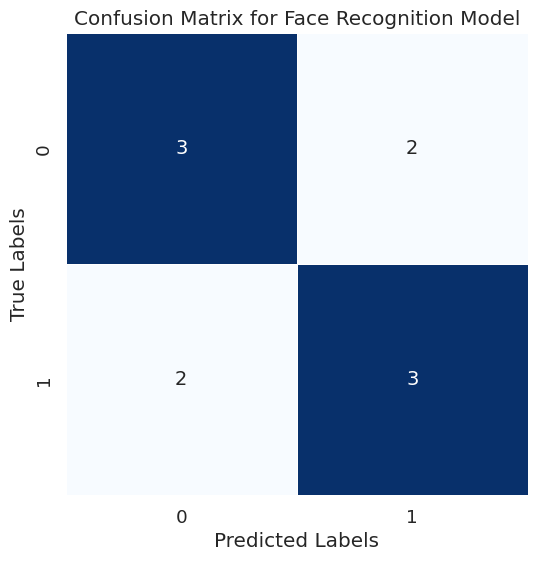

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data: True labels and predicted labels
true_labels = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1])
predicted_labels = np.array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Set up the plot
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Face Recognition Model')
plt.show()


Enter the number of True Positives (TP): 30
Enter the number of False Negatives (FN): 6
Enter the number of False Positives (FP): 1
Enter the number of True Negatives (TN): 14


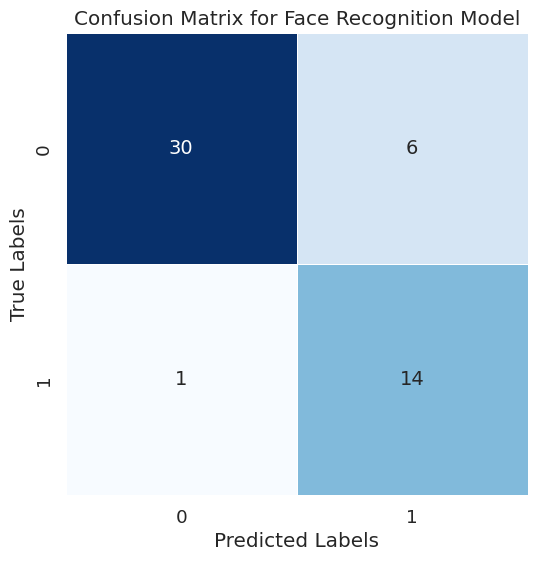


Confusion Matrix:
<function confusion_matrix at 0x78a80772e950>

Confusion Matrix Metrics:
Accuracy: 0.86
Precision: 0.97
Recall: 0.83
F1 Score: 0.90


In [ ]:
# import numpy as np1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get user input for confusion matrix values
TP = int(input("Enter the number of True Positives (TP): "))
FN = int(input("Enter the number of False Negatives (FN): "))
FP = int(input("Enter the number of False Positives (FP): "))
TN = int(input("Enter the number of True Negatives (TN): "))

# Create a confusion matrix
cm = np.array([[TP, FN], [FP, TN]])

# Calculate confusion matrix metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Face Recognition Model')
plt.show()

# Display the confusion matrix and metrics
print("\nConfusion Matrix:")
print(confusion_matrix)
print("\nConfusion Matrix Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
